In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

In [2]:
encodings = ['utf-8', 'gbk', 'gb18030']

for encoding in encodings:
    try:
        df = pd.read_csv('数据分析(1)_requirment - 副本.csv', encoding=encoding)
        print(f"成功读取文件，使用的编码为：{encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"{encoding} 编码解析失败")
print("数据维度:",df.shape)       
df.head()

utf-8 编码解析失败
成功读取文件，使用的编码为：gbk
数据维度: (1185, 1)


,requirment
0,：1、统计学、应用数学、计算机等相关专业，全日制大专及以上学历；?2、熟练掌握多种统计和分析...
1,1.熟练使用excel（vlookup、countifs、if等函数）、PPT等办公软件；2...
2,】1、大专以上学历，英语四级以上，有亚马逊运营经验相关工作经验优先；2、能够熟练使用Offi...
3,1、本科及以上学历，数学、统计学、计算机等相关专业；2、一年以上数据分析工作经验，独立编写过...
4,】1、一年以上数据运营经验；2、熟练使用Excel图表、透视及函数等数据处理功能；有SQL、...


In [3]:
print("原始数据存在缺失值数量:",df.isnull().sum())
df = df.dropna() # 删除缺失值

原始数据存在缺失值数量: requirment    0
dtype: int64


In [4]:
# 重置索引
df = df.reset_index(drop=True)

In [5]:
#加载停用词
def stopwordslist(filepath, custom_stopwords=[]):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    stopwords.extend(custom_stopwords)  # 将自定义停用词添加到列表中
    return stopwords

# 加载停用词 
custom_stopwords = ['害']  # 添加自定义停用词（我随意添加的可修改）

# 从文档中读取需要保留的词汇
def load_specific_words(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        specific_words = [line.strip() for line in file.readlines()]
    return specific_words

# 指定存储需要保留词汇的文档路径如Python
specific_words_filepath = 'specific_words.txt'

# 从文档中加载需要保留的词汇
specific_words_to_keep = load_specific_words(specific_words_filepath)

# 将特定词汇添加到停用词列表中
stopwords = stopwordslist('哈工大中文停用词.txt', custom_stopwords + specific_words_to_keep)

import jieba

# 定义数据清洗函数
def data_cleaning(content_list):
    # 初始化清洗后的文本列表
    content_seg = []
    
    # 初始化特殊字符，这些字符将被替换为空格
    symbols = '-\\～%≥℃0123456789'
    
    # 循环处理输入的文本列表
    for content in content_list:
        # 去除特殊字符，将特殊字符替换为空格
        for con in content:
            if con in symbols:
                content = content.replace(con, ' ')
                
        # 使用结巴分词进行分词，cut_all=False表示采用精确模式
        con_list = jieba.cut(content, cut_all=False)
        result_list = []
        
        # 去除停用词，\n、\u3000（全角空格）、空格也会被去除
        for con in con_list:
            if con not in stopwords and con != '\n' and con != '\u3000' and con != ' ':
                # if con not in stopwords and con != '\n' and con != '\u3000' and con != ' ' and len(con) > 1: # 修改上一行代码为这样确保只有长度大于1的词语才会被保留
                result_list.append(con)
        
        # 将分词后的结果用空格连接成字符串，存储到content_seg列表中
        str1 = ' '.join(result_list)
        content_seg.append(str1)
    
    return content_seg

In [6]:
#将评论转换为列表
contents = df['requirment'].tolist()
participle = data_cleaning(contents)
participle

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Geng\AppData\Local\Temp\jieba.cache
Loading model cost 0.813 seconds.
Prefix dict has been built successfully.


['统计学 数学 计算机 相关 专业 全日制 大专 以上学历 熟练掌握 多种 统计 分析方法 熟练 excel 熟练 MySql 数据库 书写 SQL 语句 存储 过程 较强 数据 敏感度 逻辑 分析 能力 文档 写作能力 责任心 沟通 能力 组织 管理 能力 心理 承受能力 勇于 接受 挑战 接受 出差 补贴 双休 接受 应届生 实习',
 '熟练 excel vlookup countifs if 函数 PPT 办公 软件 具备 独立 分析 报告 输出 能力 团队 管理 协调 意识 较强 分析 解决问题 能力 专科 以上学历 年 相关 数据 统计分析 工作 经验 数据 分析师 证书 优先 待遇',
 '大专 以上学历 英语 四级 亚马逊 运营 经验 相关 工作 经验 优先 熟练 软件 具备 较强 书面 口头 表达能力 具备 较强 数据 统计 能力 工作 细致 责任心 强 主动 细心 抗压 强 逻辑性 计划性 执行力 工作进度 定时 反馈 独立 完整 常规 事务性 工作 公司 福利 高薪 面子 车 房 梦 丰厚 奖金 业绩 突破 奖 运营 岗 半年度 激励 奖 运营 岗 月 年终奖 玩得 开心 国内外 带薪 旅游 聚餐 下午茶 轰 趴 年会 联谊 假期 福利 五险 一金 法定 节假日 福利 假 晋升 发展 培训 各路 大神 齐聚带 飞 一年 次 晋升 发展前景 白帽 打法 照样 产品 打爆 年 营收 亿 倍增 潜力 十足 工作 环境 超 Nice 工作 环境 氛围 老板 为原 世界 强 上市公司 亚太区 总裁 多金 帅气 博才 多学 乐于 分享 休息时间 朝九晚 月 周末 双休 月 大小 周',
 '本科 以上学历 数学 统计学 计算机 相关 专业 一年 数据分析 工作 经验 独立 编写 完整 数据分析 报告 熟练 SQL Linux 独立 数据挖掘 分析 工作 具备 沟通 能力 团队 协作 精神 积极主动 服务 意识 承受 较大 工作 压力 较强 自主 学习 能力 高度 责任心 职业 精神 技术 文档 撰写 能力 思想 政治觉悟 高 党员 优先',
 '一年 数据 运营 经验 熟练 Excel 图表 透视 函数 数据处理 功能 SQL R 任一 能力 优先 数据 足够 敏感度 耐心 具备 抗 压力 踏实 负责 独立思考 具备 跨部门 协调 沟通 能力 推动 高效

In [7]:
df['文章内容去停用词分词结果'] = participle
df.head()

,requirment,文章内容去停用词分词结果
0,：1、统计学、应用数学、计算机等相关专业，全日制大专及以上学历；?2、熟练掌握多种统计和分析...,统计学 数学 计算机 相关 专业 全日制 大专 以上学历 熟练掌握 多种 统计 分析方法 熟...
1,1.熟练使用excel（vlookup、countifs、if等函数）、PPT等办公软件；2...,熟练 excel vlookup countifs if 函数 PPT 办公 软件 具备 独...
2,】1、大专以上学历，英语四级以上，有亚马逊运营经验相关工作经验优先；2、能够熟练使用Offi...,大专 以上学历 英语 四级 亚马逊 运营 经验 相关 工作 经验 优先 熟练 软件 具备 较...
3,1、本科及以上学历，数学、统计学、计算机等相关专业；2、一年以上数据分析工作经验，独立编写过...,本科 以上学历 数学 统计学 计算机 相关 专业 一年 数据分析 工作 经验 独立 编写 完...
4,】1、一年以上数据运营经验；2、熟练使用Excel图表、透视及函数等数据处理功能；有SQL、...,一年 数据 运营 经验 熟练 Excel 图表 透视 函数 数据处理 功能 SQL R 任一...


In [8]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary
# 创建词典
train_set = df['文章内容去停用词分词结果'].apply(lambda x: x.split())  # 将文本字符串转换为列表
dictionary = corpora.Dictionary(train_set)
# 创建文档-词矩阵 词袋模型
corpus = [dictionary.doc2bow(text) for text in train_set]

In [9]:
# 查看token2id
print("Token to ID mapping:")
print(dictionary.token2id)

Token to ID mapping:
{'MySql': 0, 'SQL': 1, 'excel': 2, '专业': 3, '书写': 4, '以上学历': 5, '全日制': 6, '写作能力': 7, '出差': 8, '分析': 9, '分析方法': 10, '勇于': 11, '双休': 12, '多种': 13, '大专': 14, '存储': 15, '实习': 16, '应届生': 17, '心理': 18, '承受能力': 19, '挑战': 20, '接受': 21, '敏感度': 22, '数学': 23, '数据': 24, '数据库': 25, '文档': 26, '沟通': 27, '熟练': 28, '熟练掌握': 29, '相关': 30, '管理': 31, '组织': 32, '统计': 33, '统计学': 34, '能力': 35, '补贴': 36, '计算机': 37, '语句': 38, '责任心': 39, '较强': 40, '过程': 41, '逻辑': 42, 'PPT': 43, 'countifs': 44, 'if': 45, 'vlookup': 46, '专科': 47, '优先': 48, '具备': 49, '函数': 50, '分析师': 51, '办公': 52, '协调': 53, '团队': 54, '工作': 55, '年': 56, '待遇': 57, '意识': 58, '报告': 59, '独立': 60, '经验': 61, '统计分析': 62, '解决问题': 63, '证书': 64, '软件': 65, '输出': 66, 'Nice': 67, '一年': 68, '一金': 69, '上市公司': 70, '下午茶': 71, '世界': 72, '业绩': 73, '丰厚': 74, '为原': 75, '主动': 76, '乐于': 77, '书面': 78, '事务性': 79, '五险': 80, '亚太区': 81, '亚马逊': 82, '产品': 83, '亿': 84, '休息时间': 85, '倍增': 86, '假': 87, '假期': 88, '公司': 89, '分享': 90, '十足': 91, '半年度': 92, '博才': 93,


Trying with 2 topics:
Perplexity Score: -6.422479131784656
Coherence Score: 0.5800519276420799

Trying with 3 topics:
Perplexity Score: -6.435367633969896
Coherence Score: 0.6670099232343345

Trying with 4 topics:
Perplexity Score: -6.4655459970876885
Coherence Score: 0.7257070688722042

Trying with 5 topics:
Perplexity Score: -6.458017714251748
Coherence Score: 0.5531409912141376

Trying with 6 topics:
Perplexity Score: -6.475932744385347
Coherence Score: 0.5628425892850384

Trying with 7 topics:
Perplexity Score: -6.495025842354005
Coherence Score: 0.5984507771998923

Trying with 8 topics:
Perplexity Score: -6.502905920008166
Coherence Score: 0.5560086454313903

Trying with 9 topics:
Perplexity Score: -6.51294748349639
Coherence Score: 0.5607862010978383

Trying with 10 topics:
Perplexity Score: -6.521511006052964
Coherence Score: 0.5617207813082608

Trying with 11 topics:
Perplexity Score: -6.506522994494073
Coherence Score: 0.5157497832538779

Trying with 12 topics:
Perplexity Sco

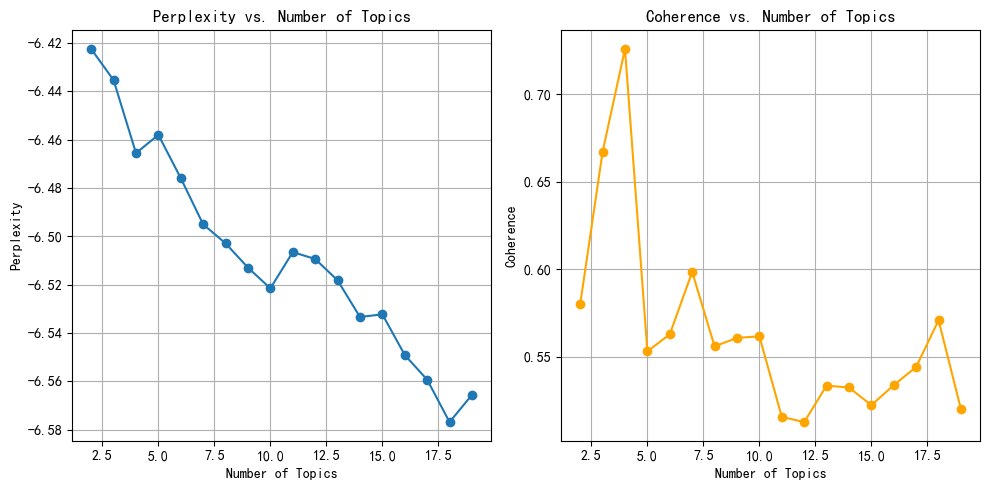

In [10]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# 尝试不同的主题数量
num_topics_range = range(2, 20)
perplexity_scores = []
coherence_scores = []

for num_topics in num_topics_range:
    print(f"\nTrying with {num_topics} topics:")
    
    # 训练 LDA 模型
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=1)
    
    # 计算困惑度
    perplexity_score = lda_model.log_perplexity(corpus)
    perplexity_scores.append(perplexity_score)
    
    # 计算一致性
    coherence_model = CoherenceModel(model=lda_model, texts=train_set, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

    # 打印并保存每次循环的困惑度和一致性得分
    print(f"Perplexity Score: {perplexity_score}")
    print(f"Coherence Score: {coherence_score}")


# 绘制曲线图
plt.figure(figsize=(10, 5))

# 绘制困惑度曲线
plt.subplot(1, 2, 1)
plt.plot(num_topics_range, perplexity_scores, marker='o')
plt.title('Perplexity vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.grid(True)

# 绘制一致性曲线
plt.subplot(1, 2, 2)
plt.plot(num_topics_range, coherence_scores, marker='o', color='orange')
plt.title('Coherence vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.grid(True)

plt.tight_layout()
plt.show()

困惑度： 困惑度值越低越好，因此你应该选择困惑度最小的主题数

一致性： 一致性值越高越好，因此你应该选择一致性最大的主题数

In [12]:
# 训练LDA模型
num_topics = 4  # 指定主题数量
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=20)

# 打印主题词分布
for topic in lda_model.print_topics(num_words=5):
    print(topic)
    
# 可视化主题模型结果
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

# 保存可视化为HTML文件
pyLDAvis.save_html(vis, 'lda_4.html')
pyLDAvis.display(vis)

(0, '0.036*"能力" + 0.029*"经验" + 0.027*"数据" + 0.026*"优先" + 0.025*"工作"')
(1, '0.014*"公司" + 0.013*"福利" + 0.011*"员工" + 0.011*"工作" + 0.008*"数据"')
(2, '0.028*"经验" + 0.017*"优先" + 0.016*"熟悉" + 0.014*"数据" + 0.013*"数据分析"')
(3, '0.044*"能力" + 0.033*"数据" + 0.029*"经验" + 0.029*"数据分析" + 0.023*"分析"')


In [13]:
# 输出每个文本属于各个主题的概率表
for i, doc in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc)
    print(f"文本 {i + 1} 主题概率表：{doc_topics}")

文本 1 主题概率表：[(0, 0.98195136)]
文本 2 主题概率表：[(0, 0.36202538), (3, 0.6224952)]
文本 3 主题概率表：[(0, 0.08012051), (1, 0.43617347), (2, 0.4817004)]
文本 4 主题概率表：[(3, 0.98525995)]
文本 5 主题概率表：[(0, 0.5835037), (1, 0.4145035)]
文本 6 主题概率表：[(0, 0.36711603), (1, 0.13126194), (3, 0.494974)]
文本 7 主题概率表：[(0, 0.14934963), (1, 0.84542096)]
文本 8 主题概率表：[(0, 0.96924335), (1, 0.010104393), (2, 0.010249261), (3, 0.010402956)]
文本 9 主题概率表：[(0, 0.9720874)]
文本 10 主题概率表：[(0, 0.95838326), (3, 0.035770964)]
文本 11 主题概率表：[(1, 0.37370646), (3, 0.61093557)]
文本 12 主题概率表：[(3, 0.98641485)]
文本 13 主题概率表：[(0, 0.45225853), (1, 0.5429411)]
文本 14 主题概率表：[(3, 0.98506254)]
文本 15 主题概率表：[(0, 0.041905567), (1, 0.036339436), (2, 0.8808866), (3, 0.040868428)]
文本 16 主题概率表：[(0, 0.22626528), (3, 0.7669616)]
文本 17 主题概率表：[(0, 0.5779824), (3, 0.41194496)]
文本 18 主题概率表：[(0, 0.73354745), (3, 0.25047654)]
文本 19 主题概率表：[(0, 0.011954023), (1, 0.011458765), (2, 0.011669521), (3, 0.9649177)]
文本 20 主题概率表：[(0, 0.981156)]
文本 21 主题概率表：[(3, 0.9869804)]
文本 22 主题概率

文本 499 主题概率表：[(0, 0.42374617), (3, 0.5589558)]
文本 500 主题概率表：[(0, 0.97495955)]
文本 501 主题概率表：[(0, 0.98658687)]
文本 502 主题概率表：[(0, 0.9442804), (1, 0.018087415), (2, 0.018373841), (3, 0.019258376)]
文本 503 主题概率表：[(3, 0.9881299)]
文本 504 主题概率表：[(0, 0.98000747)]
文本 505 主题概率表：[(3, 0.979705)]
文本 506 主题概率表：[(0, 0.9788421)]
文本 507 主题概率表：[(0, 0.5779978), (3, 0.40594107)]
文本 508 主题概率表：[(0, 0.078347936), (2, 0.037578624), (3, 0.87940216)]
文本 509 主题概率表：[(0, 0.014958264), (3, 0.9767177)]
文本 510 主题概率表：[(3, 0.9821975)]
文本 511 主题概率表：[(3, 0.9857085)]
文本 512 主题概率表：[(0, 0.99178547)]
文本 513 主题概率表：[(3, 0.9860075)]
文本 514 主题概率表：[(0, 0.94760257), (1, 0.016846858), (2, 0.017498014), (3, 0.018052557)]
文本 515 主题概率表：[(0, 0.10502297), (3, 0.8872413)]
文本 516 主题概率表：[(3, 0.9890283)]
文本 517 主题概率表：[(0, 0.9801419)]
文本 518 主题概率表：[(3, 0.9869428)]
文本 519 主题概率表：[(0, 0.70825845), (2, 0.2812565)]
文本 520 主题概率表：[(3, 0.9804968)]
文本 521 主题概率表：[(0, 0.98832744)]
文本 522 主题概率表：[(0, 0.9196706), (1, 0.027070697), (2, 0.025869401), (3, 0.02

文本 1043 主题概率表：[(2, 0.095858715), (3, 0.90123963)]
文本 1044 主题概率表：[(1, 0.6069218), (3, 0.38790527)]
文本 1045 主题概率表：[(0, 0.7412812), (1, 0.04794237), (3, 0.2031349)]
文本 1046 主题概率表：[(0, 0.79957896), (2, 0.18981868)]
文本 1047 主题概率表：[(0, 0.9655501), (1, 0.011115813), (2, 0.011519134), (3, 0.01181495)]
文本 1048 主题概率表：[(0, 0.23721392), (3, 0.7534499)]
文本 1049 主题概率表：[(2, 0.9737544)]
文本 1050 主题概率表：[(1, 0.6509858), (3, 0.3422175)]
文本 1051 主题概率表：[(0, 0.93506026), (1, 0.021260053), (2, 0.021613458), (3, 0.022066193)]
文本 1052 主题概率表：[(0, 0.9790262)]
文本 1053 主题概率表：[(1, 0.82510877), (3, 0.16631252)]
文本 1054 主题概率表：[(0, 0.43291685), (2, 0.55307317)]
文本 1055 主题概率表：[(1, 0.9776449), (3, 0.015889458)]
文本 1056 主题概率表：[(0, 0.5653938), (3, 0.42052975)]
文本 1057 主题概率表：[(3, 0.98085785)]
文本 1058 主题概率表：[(0, 0.4115882), (3, 0.5777732)]
文本 1059 主题概率表：[(0, 0.2958957), (3, 0.6892862)]
文本 1060 主题概率表：[(0, 0.986902)]
文本 1061 主题概率表：[(0, 0.96555096), (1, 0.011115814), (2, 0.01151913), (3, 0.011814104)]
文本 1062 主题概率表：[(0, 0.56184

In [14]:
# 创建一个空的 DataFrame 以存储主题概率
topic_columns = [f"Topic_{i}" for i in range(lda_model.num_topics)]
result_df = pd.DataFrame(columns=topic_columns)

# 遍历文本
for i, doc in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc)
    
    # 创建一个字典，表示主题概率
    topic_prob_dict = {f"Topic_{index}": prob for index, prob in doc_topics}
    
    # 如果主题不存在，将其概率设置为0
    missing_topics = set(topic_columns) - set(topic_prob_dict.keys())
    for missing_topic in missing_topics:
        topic_prob_dict[missing_topic] = 0.0
    
    # 将主题概率添加到 DataFrame
    result_df = pd.concat([result_df, pd.DataFrame(topic_prob_dict, index=[i])], ignore_index=True)
    
# 重置索引
result_df = result_df.reset_index(drop=True)
result_df['文本'] = df['requirment']
result_df.to_excel('每个文本属于各个主题的概率表.xlsx',index=False)
result_df

,Topic_0,Topic_1,Topic_2,Topic_3,文本
0,0.982301,0.000000,0.000000,0.000000,：1、统计学、应用数学、计算机等相关专业，全日制大专及以上学历；?2、熟练掌握多种统计和分析...
1,0.362024,0.000000,0.000000,0.622497,1.熟练使用excel（vlookup、countifs、if等函数）、PPT等办公软件；2...
2,0.080111,0.436175,0.481708,0.000000,】1、大专以上学历，英语四级以上，有亚马逊运营经验相关工作经验优先；2、能够熟练使用Offi...
3,0.000000,0.000000,0.000000,0.985263,1、本科及以上学历，数学、统计学、计算机等相关专业；2、一年以上数据分析工作经验，独立编写过...
4,0.583504,0.414504,0.000000,0.000000,】1、一年以上数据运营经验；2、熟练使用Excel图表、透视及函数等数据处理功能；有SQL、...
...,...,...,...,...,...
1180,0.177680,0.441802,0.000000,0.376203,":1.具备数据敏感度与数据分析能力，熟悉常用的统计方法，掌握excel,Bi,sql等多种数..."
1181,0.000000,0.000000,0.000000,0.990055,：1、清晰的分析逻辑以及良好的业务洞察能力，能快速发现问题、拆解问题并定位到影响业务的关键点...
1182,0.000000,0.000000,0.000000,0.982700,：1、本科及以上学历，统计学、数学等理工类相关专业；2、有较深的数据挖掘能力，3年以上数据挖...
1183,0.668571,0.025374,0.279582,0.026474,：大专以上学历，数学或者金融行业，同岗1年以上经验者优先


In [15]:
from PIL import Image
from wordcloud import WordCloud
mask = plt.imread('词云图背景.jpg')
wc = WordCloud(mask=mask, 
               background_color='white', 
               font_path='C:/Windows/Fonts/simhei.ttf'
             )

wc.generate(df['文章内容去停用词分词结果'].sum()) # 词频统计

plt.figure("词云图") #指定所绘图名称
plt.imshow(wc)       # 以图片的形式显示词云
plt.axis("off")      #关闭图像坐标系
plt.show()

ModuleNotFoundError: No module named 'wordcloud'